In [1]:
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta


Populating the interactive namespace from numpy and matplotlib


In [2]:


df = pd.read_csv('taxi.csv')
print(df.shape)

(54034, 11)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54034 entries, 0 to 54033
Data columns (total 11 columns):
id                    54034 non-null object
vendor_id             54034 non-null int64
pickup_datetime       54034 non-null object
dropoff_datetime      54034 non-null object
passenger_count       54034 non-null int64
pickup_longitude      54034 non-null float64
pickup_latitude       54034 non-null float64
dropoff_longitude     54034 non-null float64
dropoff_latitude      54034 non-null float64
store_and_fwd_flag    54034 non-null object
trip_duration         54034 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 4.5+ MB


In [4]:
# Переведем данные о посадке из текста в дату
datefunc = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
df['pickup_datetime']=df['pickup_datetime'].apply(datefunc)


## Начнем анализ с распределения поездок по количеству пассажиров, для этого подойдет обычная гистограмма. Используется поле passenger_count, гистограмма выбрана как один из наиболее удобных способов отображения распределений


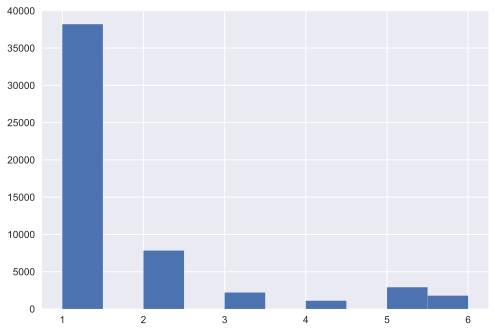

In [5]:
df.passenger_count.hist()

## Как и ожидалось, чаще всего пассажир один

In [6]:

# Теперь построим распределение поездок по времени, используешь distplot из Seaborn, он предназначен как раз для этого.
# Из используемых переменных - trip_duration

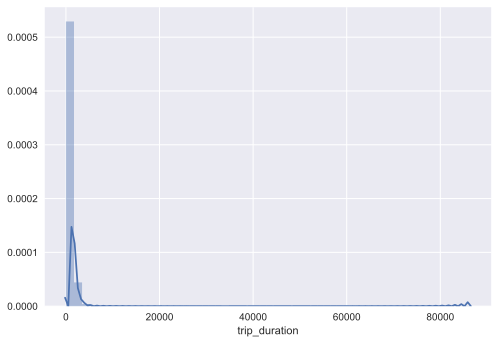

In [7]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.trip_duration);

In [8]:
# Самые популярные поездки оказались короткими, и явно есть выбросы неверных данных по 80000+.

#Теперь рассмотрим среднюю продолжительность поездки в зависимости от дня недели. Для этого введем новый параметр в датафрейм,
#преобразовав дату в день недели. Использовать будем BarChar, как наиболее удобный для сравнения вид графика.

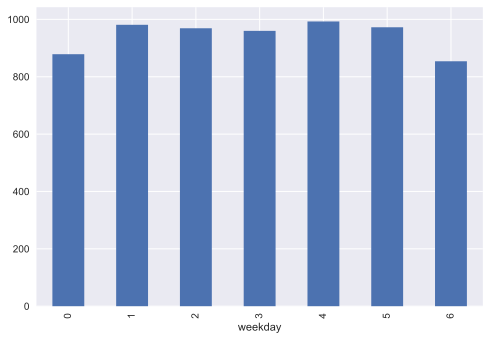

In [9]:
df['weekday']=df['pickup_datetime'].dt.dayofweek
df.groupby('weekday').trip_duration.mean().plot(kind = 'bar')

Как видно из графика, самые длинные поездки совершаются в середине недели, а к выходным и в понедельник 
длительность поездок сокращается.

Теперь посмотрим связь количества пассажиров и длины поездки.

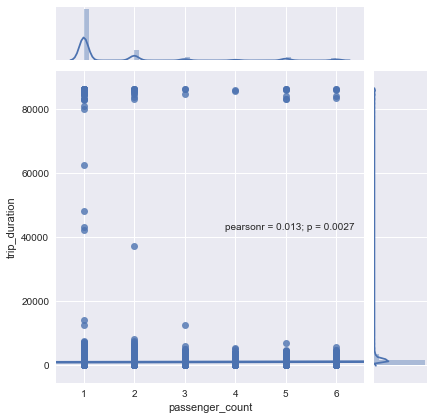

In [10]:
%config InlineBackend.figure_format = 'png'
sns.jointplot(x='passenger_count', y='trip_duration', 
              data=df, kind='reg');

Видим, что эти параметры не связаны друг с другом.


## Теперь посмотрим общую длительность поездок по месяцам, для этого снова добавим новое поле в наш датафрейм и посчитаем общую длительность поездок для каждого из месяцов. Использовать будм обычный ScatterPlot, на нем отлично будет видна разница и тренды по месяцам. Входными данными будут месяц поездки и общая длительность по всем поездкам за это время.

In [11]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [12]:
df['month']=df['pickup_datetime'].dt.month

In [13]:
months_df = df.groupby('month')[['trip_duration']].sum()

In [14]:
trace0 = go.Scatter(
    x=months_df.index,
    y=months_df.trip_duration,
    name='Total duration'
)

In [15]:
data = [trace0]
layout = {'title': 'Trip duration by month'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)


## Поскольку данные у нас только за полгода, то на графике только 6 месяцев. Видно что первые два зимних месяца после нового года такси меньше наезжает по времени, чем в последующие. Это может быть связано с более свободным трафиком на дороге. В таком случае и средняя поездка занимает меньше времени и меньше людей пользуются такси.